### Imports

In [1]:
from instagrapi import Client
import pandas as pd
import json
import ast

import seaborn as sns
import matplotlib.pyplot as plt

### Data collection

#### Assess instagrapi

In [2]:
# Cred constants
ACCOUNT_USERNAME = '****'
ACCOUNT_PASSWORD = '****'

In [3]:
# Connect to the instagrapi client
cl = Client()
cl.login(ACCOUNT_USERNAME, ACCOUNT_PASSWORD)

True

In [4]:
# Delay in requests to mimic the real user 
cl.delay_range = [1, 3] 

In [ ]:
# Check session info
cl.get_timeline_feed()

#### Collecting the followers

In [5]:
# Collecting info of our followers
frames_id = '56518990213'
frames_followers = cl.user_followers(frames_id)

In [6]:
# Turning dict of followers to the dataframe
frames_followers_df = pd.DataFrame.from_dict(frames_followers, orient='index')
frames_followers_df.head()

,0,1,2,3,4,5,6
8252797923,"(pk, 8252797923)","(username, belagruzia)","(full_name, Alesia Sut Gior)","(profile_pic_url, https://scontent-cdg4-1.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])"
1651148411,"(pk, 1651148411)","(username, niaaaaaaaah)","(full_name, Nia Gugutsidze)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, False)","(stories, [])"
623738464,"(pk, 623738464)","(username, anako_turashvili)","(full_name, Anako Turashvili)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])"
1588658456,"(pk, 1588658456)","(username, iliatatarashvili)","(full_name, Iahsari)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, False)","(stories, [])"
4886250763,"(pk, 4886250763)","(username, hudson_mohawke)","(full_name, Paata Sordia)","(profile_pic_url, https://scontent-lcy1-2.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])"


#### Transforming frames_followers_df

In [7]:
# Renaming columns, so we can change them later
frames_followers_df.columns=['id1', 'username1','full_name1','profile_pic_url1','profile_pic_url_hd1', 'is_private1', 'stories1']


In [8]:
# Functions for unpacking the columns

def unpack_tuple(df, column):
    list_of_vals = []
    for i in range(len(df)):
        val = df[column][i][1]
        list_of_vals.append(val)
    return list_of_vals

def unpack_several_cols(df, new_columns):
    old_columns = df.columns
    for new, old in zip(new_columns, old_columns):
        df[new] = unpack_tuple(df, old)

In [9]:
# Unpacking the columns
new_columns=['id', 'username','full_name','profile_pic_url','profile_pic_url_hd', 'is_private', 'stories']
unpack_several_cols(frames_followers_df, new_columns)

In [10]:
frames_followers_df.head()

,id1,username1,full_name1,profile_pic_url1,profile_pic_url_hd1,is_private1,stories1,id,username,full_name,profile_pic_url,profile_pic_url_hd,is_private,stories
8252797923,"(pk, 8252797923)","(username, belagruzia)","(full_name, Alesia Sut Gior)","(profile_pic_url, https://scontent-cdg4-1.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])",8252797923,belagruzia,Alesia Sut Gior,https://scontent-cdg4-1.cdninstagram.com/v/t51...,None,True,[]
1651148411,"(pk, 1651148411)","(username, niaaaaaaaah)","(full_name, Nia Gugutsidze)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, False)","(stories, [])",1651148411,niaaaaaaaah,Nia Gugutsidze,https://scontent-lcy1-1.cdninstagram.com/v/t51...,None,False,[]
623738464,"(pk, 623738464)","(username, anako_turashvili)","(full_name, Anako Turashvili)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])",623738464,anako_turashvili,Anako Turashvili,https://scontent-lcy1-1.cdninstagram.com/v/t51...,None,True,[]
1588658456,"(pk, 1588658456)","(username, iliatatarashvili)","(full_name, Iahsari)","(profile_pic_url, https://scontent-lcy1-1.cdni...","(profile_pic_url_hd, None)","(is_private, False)","(stories, [])",1588658456,iliatatarashvili,Iahsari,https://scontent-lcy1-1.cdninstagram.com/v/t51...,None,False,[]
4886250763,"(pk, 4886250763)","(username, hudson_mohawke)","(full_name, Paata Sordia)","(profile_pic_url, https://scontent-lcy1-2.cdni...","(profile_pic_url_hd, None)","(is_private, True)","(stories, [])",4886250763,hudson_mohawke,Paata Sordia,https://scontent-lcy1-2.cdninstagram.com/v/t51...,None,True,[]


In [11]:
frames_followers_df.to_csv('data/frames_followers.csv')

In [12]:
# Saving a sataframe with followers that have public pages
users = frames_followers_df[frames_followers_df['is_private'] == False][['id','username']]
users.head()

,id,username
1651148411,1651148411,niaaaaaaaah
1588658456,1588658456,iliatatarashvili
5739036587,5739036587,annaundmarta
576016092,576016092,annaimnadze
1732029942,1732029942,vartasashviliana


In [13]:
users.to_csv('data/users.csv')

#### Collect accounts our users follow

In [14]:
# Function for collecting accounts user following
def collect_users_following():
       
    exception_count = 0

    # Open friends dictionary - here we'll store the ids
    with open('friends.json', 'r') as json_file:
        friends_dict = json.load(json_file)

    users = pd.read_csv('users.csv')
    users_with_friends = pd.read_csv('users_with_friends.csv') # some users following we already collected
    id_list = list(users[~(users['id'].isin(friends_dict.keys()))&~(users['id'].isin(users_with_friends['id']))]['id'])

        
    while len(id_list)>=20:            
            

        id_list = list(users[~(users['id'].isin(friends_dict.keys()))&~(users['id'].isin(users_with_friends['id']))]['id'])
            

        for i in range(0, 10):          
                

            id = id_list[i]                                 

            try:

                friends = cl.user_following(id).keys()      
                new_values = {id: list(friends)}
                friends_dict.update(new_values)

                # Write the dictionary to a JSON file
                with open('friends.json', 'w') as json_file:
                    json.dump(friends_dict, json_file)

                                         
                print(f'Success for ID: {id}, dict length: {len(friends_dict)}')             

                exception_count = 0
                time.sleep(6)
                    
            except Exception as e:     

                print(f'Error for ID: {id}')  
                current_struct_time = time.localtime(time.time())
                current_time = f'Time: {current_struct_time.tm_hour}:{current_struct_time.tm_min}:{current_struct_time.tm_sec}'
                print(current_time)
                print(f'Error message: {e}')
                # traceback.print_exc()

                
                exception_count += 1
                    
                if exception_count == 5:
                    time.sleep(7200) # Instagram blocks access with too many requests so I collect in increments 
                    break
                else:
                    break
                # Ideally we want to change proxy when we catch an error with cl.set_proxy(). But since the free proxies don't work well and I don't want to pay, I use this time-consuming methon
                     
    print(f'Completed')

#### Prepare collected data for future use

In [15]:
# Open the dict with collected data
with open('friends.json', 'r') as json_file:
    friends_dict = json.load(json_file)

In [16]:
data_list = [{'id': key, 'friends_id': list(value)} for key, value in friends_dict.items()]
friends_dict_df = pd.DataFrame(data_list)
friends_dict_df

,id,friends_id
0,3951516117,"[56518990213, 259220806, 18428658, 12281817, 1..."
1,8399776279,"[56518990213, 6547571948, 1371968417, 21867282..."
2,1290250744,"[56518990213, 208560325, 37208102799, 49639072..."
3,6160971823,"[56518990213, 259220806, 489992346, 2311145, 2..."
4,288963669,"[56518990213, 37699236085, 55376870779, 747419..."
...,...,...
107,970260212,"[56518990213, 10480357, 695995017, 5123245, 30..."
108,2045670253,"[56518990213, 259220806, 25945306, 18428658, 2..."
109,30989427735,"[56518990213, 212971662, 54858589934, 10091229..."
110,332849787,"[56518990213, 460563723, 8032582326, 224651770..."


In [17]:
# some users following we already collected
users_with_friends = pd.read_csv('users_with_friends.csv') 
users_with_friends

,Unnamed: 0,id,username,friends_id
0,0,54120777372,olyarkhipova,['371806449']
1,1,191716116,azhdarov,"['56518990213', '528817151', '13460080', '2309..."
2,2,16596631,fedotova.po,"['56518990213', '259220806', '6739053665', '58..."
3,3,44577963743,swaggyymario,"['56518990213', '46023299420', '43055553379', ..."
4,4,58618143472,frnw.ph,"['56518990213', '1333014392', '314834803', '59..."
...,...,...,...,...
243,243,58288050140,_cosmic_171,"['56518990213', '58570383756', '19781615610', ..."
244,244,5954609000,iammarry18,"['56518990213', '4809411924', '49849500576', '..."
245,245,46778349315,anuka.talakvadze,"['56518990213', '695995017', '2421050', '44173..."
246,246,45217576505,______nasu,"['56518990213', '1410001003', '8410632620', '5..."


In [20]:
users_with_friends['friends_id'] = users_with_friends['friends_id'].apply(ast.literal_eval)

In [21]:
# Merge everything together
user_friends = pd.concat([users_with_friends[['id', 'friends_id']], friends_dict_df], ignore_index=True)
user_friends

,id,friends_id
0,54120777372,[371806449]
1,191716116,"[56518990213, 528817151, 13460080, 23098233, 1..."
2,16596631,"[56518990213, 259220806, 6739053665, 587696685..."
3,44577963743,"[56518990213, 46023299420, 43055553379, 520862..."
4,58618143472,"[56518990213, 1333014392, 314834803, 596157993..."
...,...,...
355,970260212,"[56518990213, 10480357, 695995017, 5123245, 30..."
356,2045670253,"[56518990213, 259220806, 25945306, 18428658, 2..."
357,30989427735,"[56518990213, 212971662, 54858589934, 10091229..."
358,332849787,"[56518990213, 460563723, 8032582326, 224651770..."


In [22]:
# Let's see how many account our users follow
user_friends['num_following'] = user_friends['friends_id'].apply(lambda x: len(x))
user_friends

,id,friends_id,num_following
0,54120777372,[371806449],1
1,191716116,"[56518990213, 528817151, 13460080, 23098233, 1...",1039
2,16596631,"[56518990213, 259220806, 6739053665, 587696685...",579
3,44577963743,"[56518990213, 46023299420, 43055553379, 520862...",185
4,58618143472,"[56518990213, 1333014392, 314834803, 596157993...",205
...,...,...,...
355,970260212,"[56518990213, 10480357, 695995017, 5123245, 30...",1327
356,2045670253,"[56518990213, 259220806, 25945306, 18428658, 2...",1032
357,30989427735,"[56518990213, 212971662, 54858589934, 10091229...",145
358,332849787,"[56518990213, 460563723, 8032582326, 224651770...",411


In [23]:
user_friends.num_following.describe()

count     360.000000
mean      720.280556
std       815.108350
min         0.000000
25%       264.000000
50%       485.000000
75%       844.000000
max      6604.000000
Name: num_following, dtype: float64

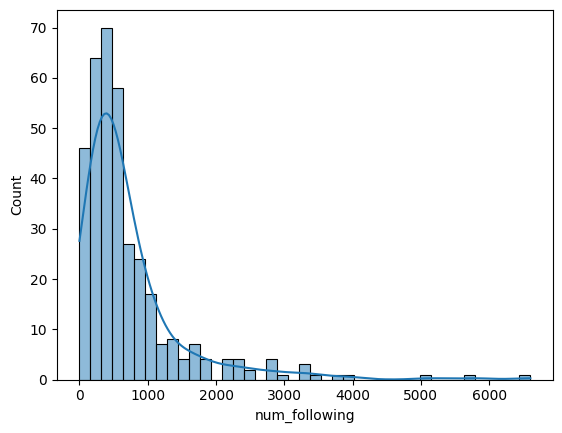

In [26]:
sns.histplot(data = user_friends.num_following, kde=True)
plt.show()

In [27]:
user_friends.to_csv('data/user_friends.csv')